## Multi-plot grids

### seaborn.FacetGrid
class seaborn.FacetGrid(data, row=None, col=None, hue=None, col_wrap=None, sharex=True, sharey=True, height=3, aspect=1, palette=None, row_order=None, col_order=None, hue_order=None, hue_kws=None, dropna=True, legend_out=True, despine=True, margin_titles=False, xlim=None, ylim=None, subplot_kws=None, gridspec_kws=None, size=None)
Multi-plot grid for plotting conditional relationships.

__init__(self, data, row=None, col=None, hue=None, col_wrap=None, sharex=True, sharey=True, height=3, aspect=1, palette=None, row_order=None, col_order=None, hue_order=None, hue_kws=None, dropna=True, legend_out=True, despine=True, margin_titles=False, xlim=None, ylim=None, subplot_kws=None, gridspec_kws=None, size=None)
Initialize the matplotlib figure and FacetGrid object.

This class maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset. The plots it produces are often called “lattice”, “trellis”, or “small-multiple” graphics.

It can also represent levels of a third variable with the hue parameter, which plots different subsets of data in different colors. This uses color to resolve elements on a third dimension, but only draws subsets on top of each other and will not tailor the hue parameter for the specific visualization the way that axes-level functions that accept hue will.

When using seaborn functions that infer semantic mappings from a dataset, care must be taken to synchronize those mappings across facets (e.g., by defing the hue mapping with a palette dict or setting the data type of the variables to category). In most cases, it will be better to use a figure-level function (e.g. relplot() or catplot()) than to use FacetGrid directly.

The basic workflow is to initialize the FacetGrid object with the dataset and the variables that are used to structure the grid. Then one or more plotting functions can be applied to each subset by calling FacetGrid.map() or FacetGrid.map_dataframe(). Finally, the plot can be tweaked with other methods to do things like change the axis labels, use different ticks, or add a legend. See the detailed code examples below for more information.

See the tutorial for more information.

Parameters
dataDataFrame
Tidy (“long-form”) dataframe where each column is a variable and each row is an observation.

row, col, huestrings
Variables that define subsets of the data, which will be drawn on separate facets in the grid. See the *_order parameters to control the order of levels of this variable.

col_wrapint, optional
“Wrap” the column variable at this width, so that the column facets span multiple rows. Incompatible with a row facet.

share{x,y}bool, ‘col’, or ‘row’ optional
If true, the facets will share y axes across columns and/or x axes across rows.

heightscalar, optional
Height (in inches) of each facet. See also: aspect.

aspectscalar, optional
Aspect ratio of each facet, so that aspect * height gives the width of each facet in inches.

palettepalette name, list, or dict, optional
Colors to use for the different levels of the hue variable. Should be something that can be interpreted by color_palette(), or a dictionary mapping hue levels to matplotlib colors.

{row,col,hue}_orderlists, optional
Order for the levels of the faceting variables. By default, this will be the order that the levels appear in data or, if the variables are pandas categoricals, the category order.

hue_kwsdictionary of param -> list of values mapping
Other keyword arguments to insert into the plotting call to let other plot attributes vary across levels of the hue variable (e.g. the markers in a scatterplot).

legend_outbool, optional
If True, the figure size will be extended, and the legend will be drawn outside the plot on the center right.

despineboolean, optional
Remove the top and right spines from the plots.

margin_titlesbool, optional
If True, the titles for the row variable are drawn to the right of the last column. This option is experimental and may not work in all cases.

{x, y}lim: tuples, optional
Limits for each of the axes on each facet (only relevant when share{x, y} is True).

subplot_kwsdict, optional
Dictionary of keyword arguments passed to matplotlib subplot(s) methods.

gridspec_kwsdict, optional
Dictionary of keyword arguments passed to matplotlib’s gridspec module (via plt.subplots). Ignored if col_wrap is not None.

Examples

Initialize a 2x2 grid of facets using the tips dataset:

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', color_codes=True)
tips = sns.load_dataset('tips')
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


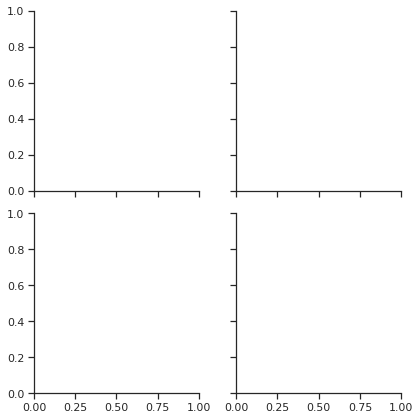

In [3]:
g = sns.FacetGrid(data=tips, col='time', row='smoker')

Draw a univariate plot on each facet:

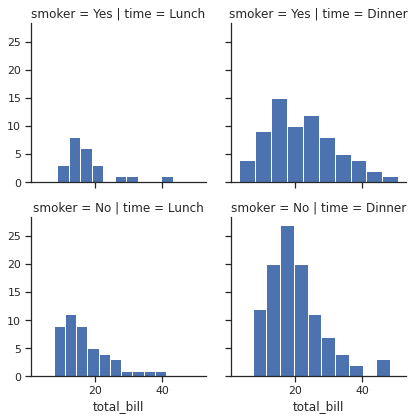

In [5]:
g = sns.FacetGrid(data=tips, col='time', row='smoker')
g = g.map(plt.hist, 'total_bill')

(Note that it’s not necessary to re-catch the returned variable; it’s the same object, but doing so in the examples makes dealing with the doctests somewhat less annoying).

Pass additional keyword arguments to the mapped function:

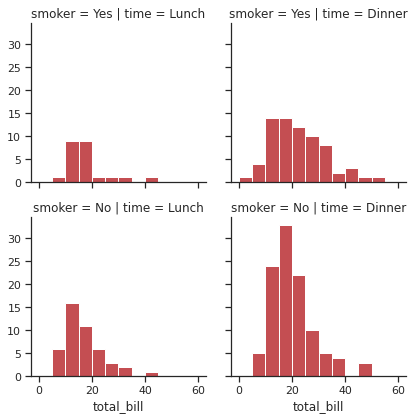

In [6]:
import numpy as np
bins = np.arange(0,65,5)
g = sns.FacetGrid(data=tips, col='time', row='smoker')
g = g.map(plt.hist, 'total_bill', bins=bins, color='r')

Plot a bivariate function on each facet:

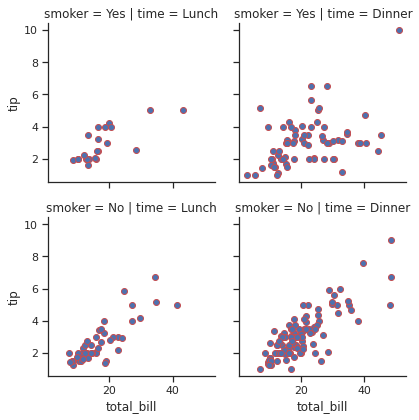

In [9]:
g = sns.FacetGrid(data=tips, col='time', row='smoker')
g = g.map(plt.scatter, 'total_bill', 'tip', edgecolor='r')

Assign one of the variables to the color of the plot elements:

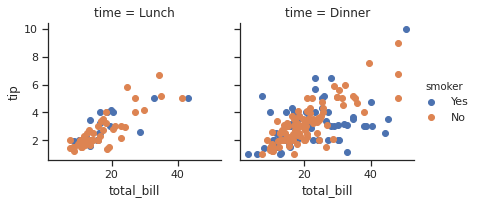

In [11]:
g = sns.FacetGrid(data=tips, col='time', hue='smoker')
g = g.map(plt.scatter, 'total_bill', 'tip')
g = g.add_legend()

Change the height and aspect ratio of each facet:

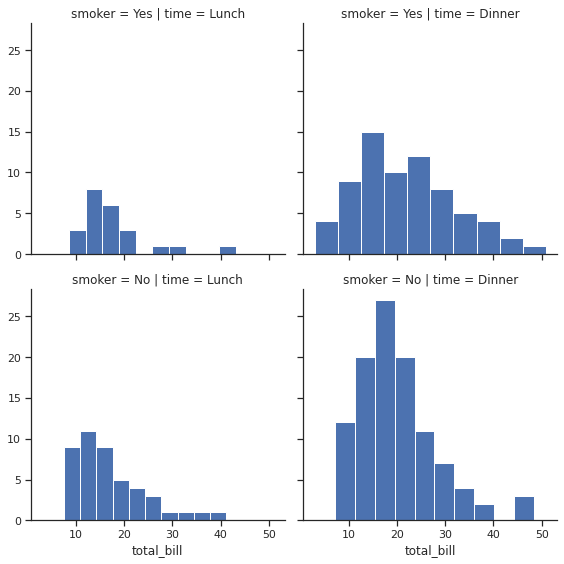

In [4]:
g = sns.FacetGrid(data=tips, col='time', row='smoker', height=4, aspect=1)
g = g.map(plt.hist, 'total_bill')

Specify the order for plot elements:

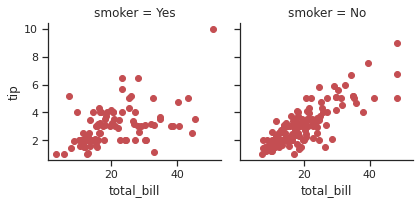

In [23]:
g = sns.FacetGrid(data=tips, col='smoker', col_order=['Yes', 'No'])
g = g.map(plt.scatter, 'total_bill', 'tip', color='r')

Use a different color palette

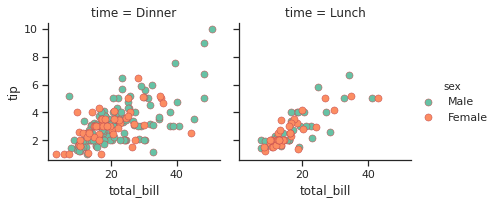

In [30]:
kws = dict(s=50, linewidth=0.5, edgecolor='r')
g = sns.FacetGrid(data=tips, col='time', hue='sex',palette='Set2', col_order=['Dinner', 'Lunch'])
g = g.map(plt.scatter, 'total_bill', 'tip', **kws)
g = g.add_legend()

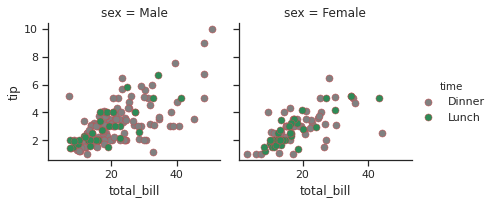

In [31]:
#Use a dictionary mapping hue levels to colors:

pal = dict(Lunch="seagreen", Dinner="gray")
g = sns.FacetGrid(tips, col="sex", hue="time", palette=pal,
                  hue_order=["Dinner", "Lunch"])
g = (g.map(plt.scatter, "total_bill", "tip", **kws)
     .add_legend())

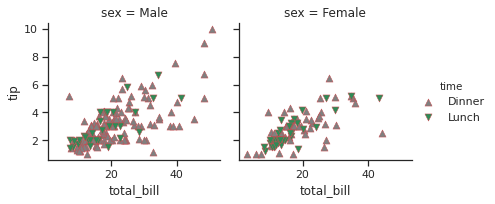

In [32]:
# Additionally use a different marker for the hue levels:

g = sns.FacetGrid(tips, col="sex", hue="time", palette=pal,
                  hue_order=["Dinner", "Lunch"],
                  hue_kws=dict(marker=["^", "v"]))
g = (g.map(plt.scatter, "total_bill", "tip", **kws)
     .add_legend())

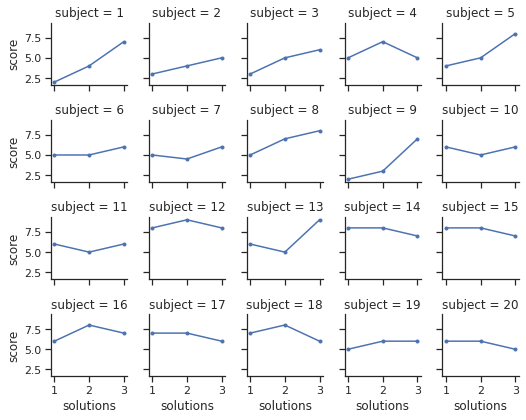

In [33]:
# “Wrap” a column variable with many levels into the rows:

att = sns.load_dataset("attention")
g = sns.FacetGrid(att, col="subject", col_wrap=5, height=1.5)
g = g.map(plt.plot, "solutions", "score", marker=".")

Use different axes labels after plotting:

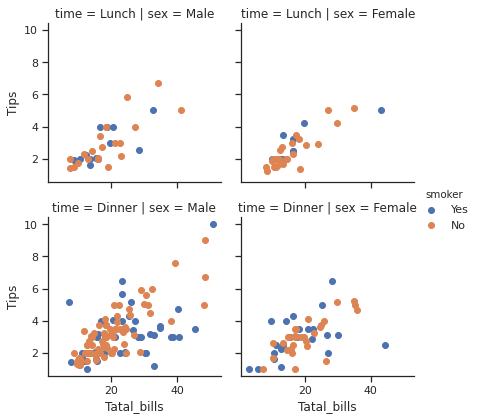

In [38]:
g = sns.FacetGrid(data=tips, col='sex', row='time', hue='smoker')
g = g.map(plt.scatter, 'total_bill', 'tip')
g = g.set_axis_labels('Tatal_bills', 'Tips')
g = g.add_legend()

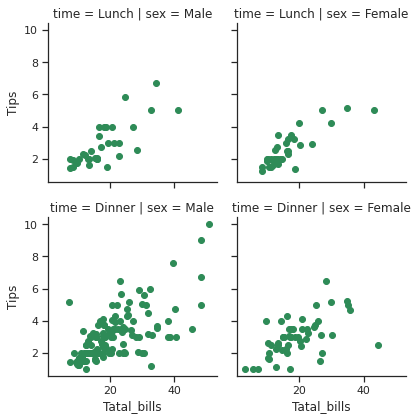

In [39]:
g = sns.FacetGrid(data=tips, col='sex', row='time', hue='smoker')
g = g.map(plt.scatter, 'total_bill', 'tip', color='seagreen')
g = g.set_axis_labels('Tatal_bills', 'Tips')
# if we specify the color then hue will not work

Set other attributes that are shared across the facetes:

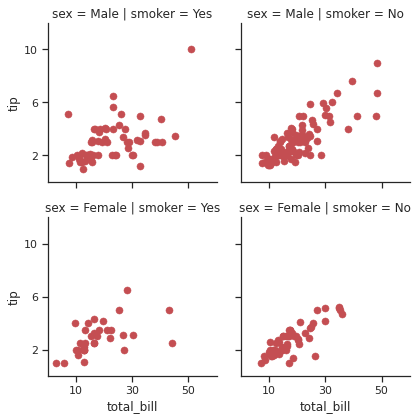

In [40]:
g = sns.FacetGrid(tips, col="smoker", row="sex")
g = (g.map(plt.scatter, "total_bill", "tip", color="r", **kws)
      .set(xlim=(0, 60), ylim=(0, 12),
           xticks=[10, 30, 50], yticks=[2, 6, 10]))

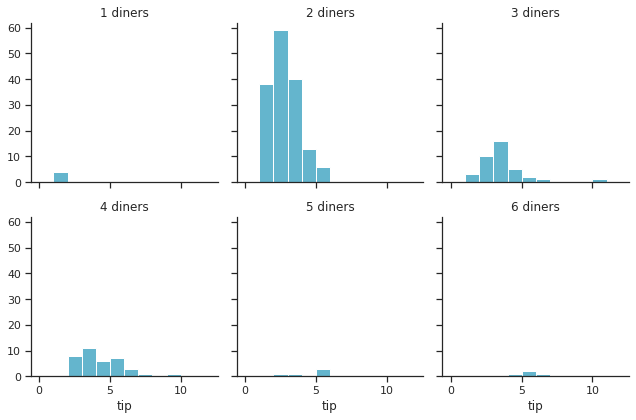

In [41]:
# Use a different template for the facet titles:

g = sns.FacetGrid(tips, col="size", col_wrap=3)
g = (g.map(plt.hist, "tip", bins=np.arange(0, 13), color="c")
      .set_titles("{col_name} diners"))

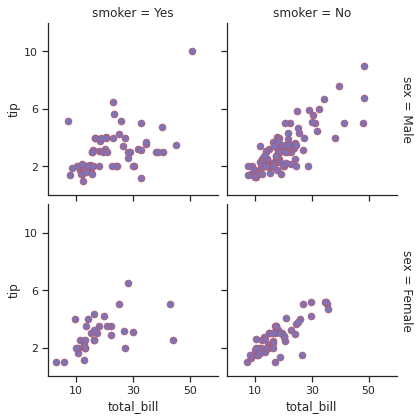

In [42]:
# Tighten the facets:

g = sns.FacetGrid(tips, col="smoker", row="sex",
                  margin_titles=True)
g = (g.map(plt.scatter, "total_bill", "tip", color="m", **kws)
      .set(xlim=(0, 60), ylim=(0, 12),
           xticks=[10, 30, 50], yticks=[2, 6, 10])
      .fig.subplots_adjust(wspace=.05, hspace=.05))